<a href="https://colab.research.google.com/github/vtu23325/Quantum-machine-learning/blob/main/QML_TASK_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


TASK 8: GROVER'S ALGORITHM (3-QUBIT)
Searching for item 5 in 8-item database
Initial state probabilities: [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
After iteration 1: P(5) = 0.781
After iteration 2: P(5) = 0.945


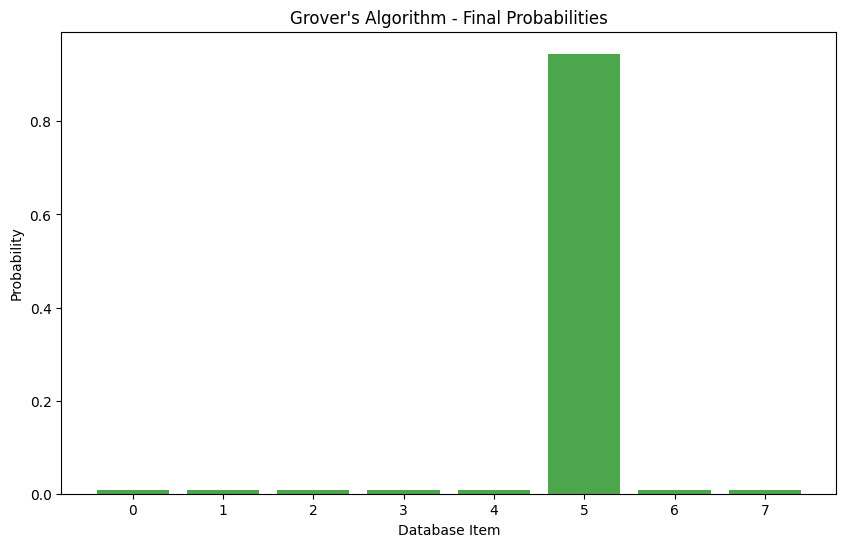

In [2]:
import numpy as np
import matplotlib.pyplot as plt

print("\n" + "="*50)
print("TASK 8: GROVER'S ALGORITHM (3-QUBIT)")
print("="*50)

def grover_diffuser_3qubit():
    """Create 3-qubit Grover diffusion operator"""
    # 2|s⟩⟨s| - I, where |s⟩ is uniform superposition
    s = np.ones(8) / np.sqrt(8)
    diffuser = 2 * np.outer(s, s) - np.eye(8)
    return diffuser

def grover_3qubit(marked_item=5, iterations=2):
    """Implement Grover's algorithm for 3-qubit database"""
    print(f"Searching for item {marked_item} in 8-item database")

    # Initialize uniform superposition
    state = np.ones(8) / np.sqrt(8)
    print(f"Initial state probabilities: {np.abs(state)**2}")

    # Create oracle and diffuser
    oracle = np.eye(8)
    oracle[marked_item, marked_item] = -1
    diffuser = grover_diffuser_3qubit()

    # Apply Grover iterations
    for i in range(iterations):
        state = diffuser @ oracle @ state
        print(f"After iteration {i+1}: P({marked_item}) = {np.abs(state[marked_item])**2:.3f}")

    return state, np.abs(state)**2

final_state, probabilities = grover_3qubit()

# Visualize results
plt.figure(figsize=(10, 6))
items = list(range(8))
plt.bar(items, probabilities, color='green', alpha=0.7)
plt.xlabel('Database Item')
plt.ylabel('Probability')
plt.title("Grover's Algorithm - Final Probabilities")
plt.show()